In [ ]:
!pip install pymupdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 35.1 MB/s eta 0:00:00


In [ ]:
import fitz  # PyMuPDF
import re

def extract_text_from_pdf(pdf_path):
    doc = fitz.open(pdf_path)
    text = ""
    for page in doc:
        text += page.get_text()
    return text


pdf_path = "/content/Supernovae.pdf"
text = extract_text_from_pdf(pdf_path)
print(text[:1000])

DES-2023-805
FERMILAB-PUB-23-0821-PPD
Draft version June 10, 2024
Typeset using L
A
T
EX twocolumn style in AASTeX631
The Dark Energy Survey: Cosmology Results With ∼1500 New High-redshift Type Ia Supernovae
Using The Full 5-year Dataset
DES Collaboration: T. M. C. Abbott,1 M. Acevedo,2 M. Aguena,3 A. Alarcon,4 S. Allam,5 O. Alves,6
A. Amon,7 F. Andrade-Oliveira,6 J. Annis,5 P. Armstrong,8 J. Asorey,9 S. Avila,10 D. Bacon,11
B. A. Bassett,12, 13 K. Bechtol,14 P. H. Bernardinelli,15 G. M. Bernstein,16 E. Bertin,17, 18 J. Blazek,19
S. Bocquet,20 D. Brooks,21 D. Brout,22 E. Buckley-Geer,23, 5 D. L. Burke,24, 25 H. Camacho,26, 3 R. Camilleri,27
A. Campos,28 A. Carnero Rosell,29, 3, 30 D. Carollo,31 A. Carr,27 J. Carretero,10 F. J. Castander,32, 33
R. Cawthon,34 C. Chang,23, 35 R. Chen,2 A. Choi,36 C. Conselice,37, 38 M. Costanzi,39, 31, 40 L. N. da Costa,3
M. Crocce,32, 33 T. M. Davis,27 D. L. DePoy,41 S. Desai,42 H. T. Diehl,5 M. Dixon,43 S. Dodelson,28, 44 P. Doel,21
C. Doux,16, 45 A. Dr

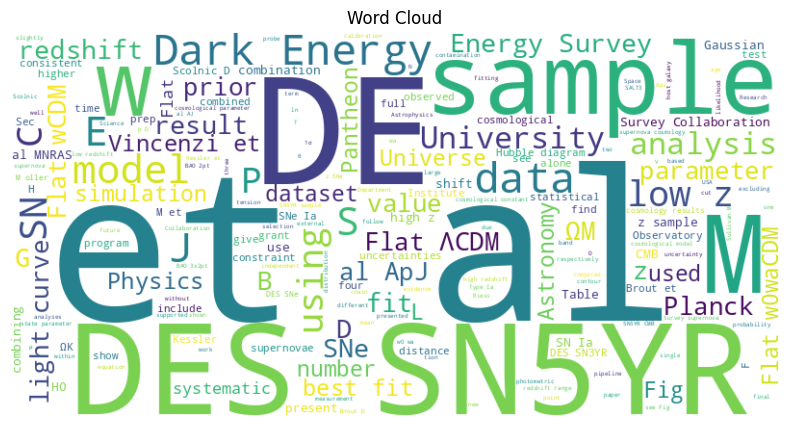

In [ ]:
#Visualize the Text using Word Cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

def visualize_text(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud')
    plt.show()

visualize_text(text)

In [ ]:
def chunk_text(text, max_length=512):
    words = text.split()
    chunks = []
    current_chunk = []
    current_length = 0
    for word in words:
        if current_length + len(word) + 1 > max_length:
            chunks.append(" ".join(current_chunk))
            current_chunk = []
            current_length = 0
        current_chunk.append(word)
        current_length += len(word) + 1
    chunks.append(" ".join(current_chunk))
    return chunks

chunks = chunk_text(text)
print(chunks[:5])


['DES-2023-805 FERMILAB-PUB-23-0821-PPD Draft version June 10, 2024 Typeset using L A T EX twocolumn style in AASTeX631 The Dark Energy Survey: Cosmology Results With ∼1500 New High-redshift Type Ia Supernovae Using The Full 5-year Dataset DES Collaboration: T. M. C. Abbott,1 M. Acevedo,2 M. Aguena,3 A. Alarcon,4 S. Allam,5 O. Alves,6 A. Amon,7 F. Andrade-Oliveira,6 J. Annis,5 P. Armstrong,8 J. Asorey,9 S. Avila,10 D. Bacon,11 B. A. Bassett,12, 13 K. Bechtol,14 P. H. Bernardinelli,15 G. M. Bernstein,16 E.', 'Bertin,17, 18 J. Blazek,19 S. Bocquet,20 D. Brooks,21 D. Brout,22 E. Buckley-Geer,23, 5 D. L. Burke,24, 25 H. Camacho,26, 3 R. Camilleri,27 A. Campos,28 A. Carnero Rosell,29, 3, 30 D. Carollo,31 A. Carr,27 J. Carretero,10 F. J. Castander,32, 33 R. Cawthon,34 C. Chang,23, 35 R. Chen,2 A. Choi,36 C. Conselice,37, 38 M. Costanzi,39, 31, 40 L. N. da Costa,3 M. Crocce,32, 33 T. M. Davis,27 D. L. DePoy,41 S. Desai,42 H. T. Diehl,5 M. Dixon,43 S. Dodelson,28, 44 P. Doel,21 C. Doux,16, 45 

In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

tokenized_chunks = [tokenizer(chunk, padding='max_length', truncation=True, max_length=512, return_tensors='pt') for chunk in chunks]


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
import torch
from torch.utils.data import Dataset
from transformers import BertTokenizer, BertConfig, BertForSequenceClassification, Trainer, TrainingArguments


texts = [
    "We present cosmological constraints from the sample of Type Ia supernovae (SN Ia) discovered and measured during the full five years of the Dark Energy Survey (DES) Supernova Program.",
    "This quintuples the number of high-quality z > 0.5 SNe compared to the previous leading compilation of Pantheon+.",
    "we classify the DES supernovae using a machine learning algorithm applied to their light curves in four photometric bands.",
    "Spectroscopic redshifts are acquired from a dedicated follow-up survey of the host galaxies.",
    "we find 1635 DES SNe in the redshift-range 0.10 < z < 1.13 that pass quality selection criteria sufficient to constrain cosmological parameters.",
    "To derive cosmological constraints we combine the DES supernova data with a high-quality external low-redshift sample.",
    "The Dark Energy Survey: Cosmology Results With ∼1500 New High-redshift Type Ia Supernovae",
    "DES Collaboration: T. M. C. Abbott, M. Acevedo, et al.",
    "We present cosmological constraints from the sample of Type Ia supernovae...",
    "Draft version June 10, 2024"
]

labels = [
    0,  # Supernova Type
    1,  # Luminosity
    2,  # Light Curve
    3,  # Spectrum
    4,  # Redshift
    5,  # Distance
    6,  # Paper Information (Title)
    7,  # Paper Information (Authors)
    8,  # Abstract
    9   # Publication Details (Date)
]

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

class SupernovaDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        labels = self.labels[idx]
        encoding = self.tokenizer(text, padding='max_length', truncation=True, max_length=self.max_length, return_tensors='pt')
        item = {key: val.squeeze() for key, val in encoding.items()}
        item['labels'] = torch.tensor(labels, dtype=torch.long)
        return item

train_dataset = SupernovaDataset(texts, labels, tokenizer)

print(train_dataset[0])



{'input_ids': tensor([  101,  2057,  2556,  2522, 25855,  9966, 14679,  2013,  1996,  7099,
         1997,  2828, 24264,  3565, 13455,  2063,  1006,  1055,  2078, 24264,
         1007,  3603,  1998,  7594,  2076,  1996,  2440,  2274,  2086,  1997,
         1996,  2601,  2943,  5002,  1006,  4078,  1007,  3565, 13455,  2565,
         1012,   102,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0, 

In [ ]:
from transformers import BertConfig, BertForTokenClassification, Trainer, TrainingArguments


config = BertConfig(
    vocab_size=30522,
    hidden_size=768,
    num_hidden_layers=12,
    num_attention_heads=12,
    intermediate_size=3072,
    max_position_embeddings=512,
    type_vocab_size=2,
    num_labels=10
)


model = BertForSequenceClassification(config)


training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=10,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
)


trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=train_dataset

trainer.train()


Step,Training Loss


TrainOutput(global_step=20, training_loss=2.3190635681152343, metrics={'train_runtime': 19.8037, 'train_samples_per_second': 5.05, 'train_steps_per_second': 1.01, 'total_flos': 26312995430400.0, 'train_loss': 2.3190635681152343, 'epoch': 10.0})

In [ ]:
results = trainer.evaluate()
print(results)


{'eval_loss': 2.289308786392212, 'eval_runtime': 0.3885, 'eval_samples_per_second': 25.743, 'eval_steps_per_second': 5.149, 'epoch': 10.0}


In [ ]:
def extract_and_process_pdf(pdf_path, tokenizer, model):

    text = extract_text_from_pdf(pdf_path)


    chunks = chunk_text(text)


    tokenized_chunks = [tokenizer(chunk, padding='max_length', truncation=True, max_length=512, return_tensors='pt') for chunk in chunks]


    model.eval()
    for tokenized_chunk in tokenized_chunks:
        inputs = {key: value.squeeze(0).unsqueeze(0) for key, value in tokenized_chunk.items()}
        with torch.no_grad():
            outputs = model(**inputs)
        print(outputs)


extract_and_process_pdf(pdf_path, tokenizer, model)


In [ ]:
import torch

def predict(text, model, tokenizer, device, max_length=512):
    model.eval()
    encoding = tokenizer(text, padding='max_length', truncation=True, max_length=max_length, return_tensors='pt')
    inputs = {key: value.to(device) for key, value in encoding.items()}
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    predicted_class_id = torch.argmax(logits, dim=-1).item()
    return predicted_class_id

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

new_text = "New observations of supernovae have revealed interesting properties of Type Ia supernovae..."
predicted_label = predict(new_text, model, tokenizer, device)
label_map = ["Supernova Type", "Luminosity", "Light Curve", "Spectrum", "Redshift", "Distance", "Paper Information (Title)", "Paper Information (Authors)", "Abstract", "Publication Details (Date)"]
print(f"Predicted label: {label_map[predicted_label]}")


Predicted label: Light Curve


In [ ]:
new_texts = [
    "The brightness of the supernova declined rapidly over time, suggesting it was a Type II supernova.",
    "The light curve data shows a steady increase in brightness followed by a sharp decline.",
    "Spectroscopic analysis reveals strong hydrogen lines, indicating a Type II-P supernova.",
    "Redshift measurements place the supernova at a distance of approximately 1 billion light-years.",
    "This paper presents the results of our observations using the Hubble Space Telescope."
]

predicted_labels = [predict(text, model, tokenizer, device) for text in new_texts]

label_map = ["Supernova Type", "Luminosity", "Light Curve", "Spectrum", "Redshift", "Distance", "Paper Information (Title)", "Paper Information (Authors)", "Abstract", "Publication Details (Date)"]

for text, label_id in zip(new_texts, predicted_labels):
    print(f"Text: {text}\nPredicted label: {label_map[label_id]}\n")


Text: The brightness of the supernova declined rapidly over time, suggesting it was a Type II supernova.
Predicted label: Light Curve

Text: The light curve data shows a steady increase in brightness followed by a sharp decline.
Predicted label: Light Curve

Text: Spectroscopic analysis reveals strong hydrogen lines, indicating a Type II-P supernova.
Predicted label: Light Curve

Text: Redshift measurements place the supernova at a distance of approximately 1 billion light-years.
Predicted label: Light Curve

Text: This paper presents the results of our observations using the Hubble Space Telescope.
Predicted label: Light Curve

